# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

###  Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import os
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
!pip -q install ./python
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display



  Running setup.py bdist_wheel for pyvirtualdisplay ... done
  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Running setup.py bdist_wheel for EasyProcess ... done
  Stored in directory: /root/.cache/pip/wheels/b4/c6/e3/c163b04029d8fccfd54b809802640c1af587a01be8d7a04e1a
Successfully built pyvirtualdisplay EasyProcess
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:

from unityagents import UnityEnvironment
import numpy as np
# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain# get t 
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size

# examine the state space 
state = env_info.vector_observations[0]
state_size = len(state)

# Simple DQN Implementation 

In [5]:
import  gym
import  pickle
import  random
import  torch
import  numpy  as  np
from  collections  import deque
#from dqn_agent import DQNAgent, DDQNAgent, DDQNPREAgent
from dqn_agentt import Agent
n_episodes = 2000
eps_start = 1.
eps_end=0.01
eps_decay=0.995
max_t = 1000
Typemodel = 'DQN'

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

scores = []                        # list containing scores from each episode
                
scores_mean = []                    # List containing the mean of the last 100 episodes
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    for t in range(max_t):
        # action = np.random.randint(action_size)        # select an action
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    
    scores_mean.append(np.mean(scores_window)) # save most recent std dev
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=13.0:
        s_msg = '\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
        print(s_msg.format(i_episode, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpointDQN.pth')
        break
        


Episode 100	Average Score: 0.63
Episode 200	Average Score: 3.69
Episode 300	Average Score: 7.32
Episode 400	Average Score: 11.10
Episode 500	Average Score: 12.35
Episode 528	Average Score: 13.02
Environment solved in 528 episodes!	Average Score: 13.02


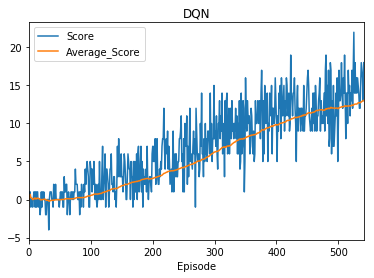

In [6]:
import pandas as pd


DQN=pd.DataFrame()
DQN['Episode']=np.arange(len(scores))
DQN['Score']=scores
DQN['Average_Score']=scores_mean
DQN.plot(x="Episode", y=["Score", "Average_Score"])

plt.title('DQN')
plt.show()

## Double DQN Implementation
The only changes are as follow:
from ddqn_agent import DoubleDQAgent





In [13]:
#%%time
import  gym
import  pickle
import  random
import  torch
import  numpy  as  np
from  collections  import deque
#from dqn_agent import DQNAgent, DDQNAgent, DDQNPREAgent
from ddqn_agent import DoubleDQAgent
n_episodes = 2000
eps_start = 1.
eps_end=0.01
eps_decay=0.995
max_t = 1000


agent = DoubleDQAgent(state_size=state_size, action_size=action_size, seed=0,DDQ=True)

scores = []                        # list containing scores from each episode

scores_mean = []                    # List containing the mean of the last 100 episodes
scores_window = deque(maxlen=100)  # last 100 scores
eps = eps_start                    # initialize epsilon

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    for t in range(max_t):
        # action = np.random.randint(action_size)        # select an action
        action = agent.act(state, eps)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score

    scores_mean.append(np.mean(scores_window)) # save most recent std dev
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=13.0:
        s_msg = '\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
        print(s_msg.format(i_episode, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpointDDQN.pth')
        break


Episode 100	Average Score: 1.20
Episode 200	Average Score: 4.20
Episode 300	Average Score: 7.05
Episode 400	Average Score: 10.17
Episode 500	Average Score: 12.48
Episode 524	Average Score: 13.01
Environment solved in 524 episodes!	Average Score: 13.01


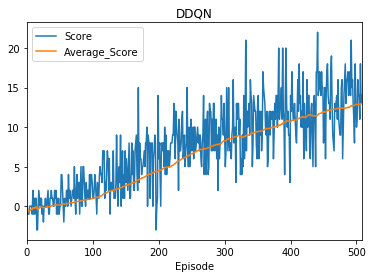

In [9]:
import pandas as pd
# plot the scores
fig = plt.figure()
DDQN=pd.DataFrame()
DDQN['Episode']=np.arange(len(scores))
DDQN['Score']=scores
DDQN['Average_Score']=scores_mean
DDQN.plot(x="Episode", y=["Score", "Average_Score"])

plt.title('DDQN')
plt.show()

# Results 

,Number of Episodes
Model,
DQN,542
DDQN,509


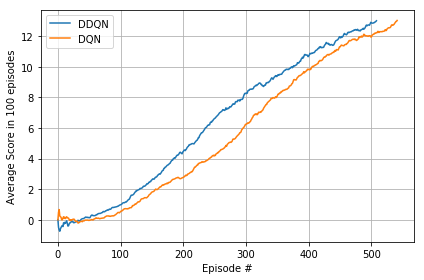

In [12]:
import seaborn as sns
import numpy as np

%matplotlib inline


# plot the scores
f, ax = plt.subplots(1, 1, figsize=(6,4), sharex=True, sharey=True)
ax.plot(DDQN['Episode'], DDQN['Average_Score'], label=DDQN)
ax.plot(DQN['Episode'], DQN['Average_Score'], label=DQN)
ax.set_ylabel('Average Score in 100 episodes')
ax.set_xlabel('Episode #')
ax.legend(['DDQN','DQN'])
ax.grid()
f.tight_layout()

Results=pd.DataFrame()
Results['Model']=['DQN','DDQN']
Results['Number of Episodes']=[len(DQN['Episode']),len(DDQN['Episode'])]
Results.set_index(['Model'],inplace=True)


with open('Results.tex', 'w') as tf:
     tf.write(Results.to_latex())
Results        

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-371ae1kw-build
  Running setup.py install for pytorchviz ... done
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


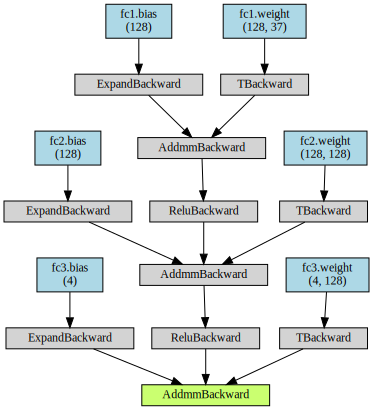

In [11]:
!pip install git+https://github.com/szagoruyko/pytorchviz
from torchviz import make_dot, make_dot_from_trace
import torch
import torch.nn as nn
import torch.nn.functional as F
from model import QNetwork
from torch.autograd import Variable
from torchviz import make_dot
model = QNetwork(37, 4, 42)
x = Variable(torch.randn(1,37))
y = model(x)
             
make_dot(y, params=dict(list(model.named_parameters())))

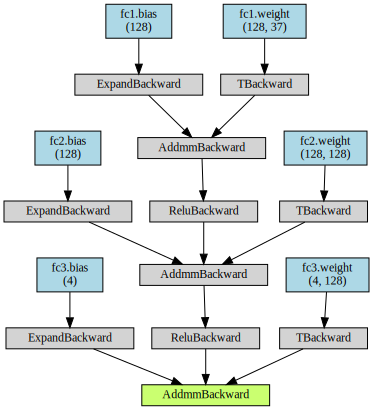